# Autoencoders (Redes Neuronales) (ML No Supervisado)

Los autoencoders son un tipo de modelo de aprendizaje automático que utiliza aprendizaje no supervisado para aprender representaciones codificadas de los datos.

Un autoencoder aprende a comprimir los datos en una representación de menor dimensión y luego los reconstruye de vuelta a su forma original o una forma aproximada.

La normalización de los datos a un rango de 0 a 1 ayuda a evitar problemas numéricos durante el entrenamiento y generalmente permite que el algoritmo aprenda más eficientemente.



In [1]:
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split

Dataset load_digits: 
    
Consiste en imágenes en escala de grises de 8x8 píxeles de dígitos escritos a mano, del 0 al 9.
Cada imagen se aplana en un vector de características de 64 características (8x8 píxeles).
La función devuelve un objeto similar a un diccionario.

In [2]:
digitos = load_digits()
digitos


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
digitos['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [4]:
digitos['data'][0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

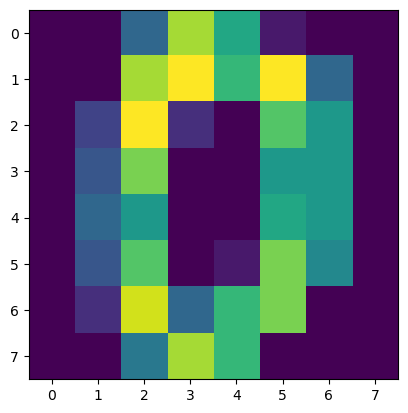

In [5]:
#Van desde 0 hasta 1797 
plt.imshow(digitos['data'][0].reshape(8,8))

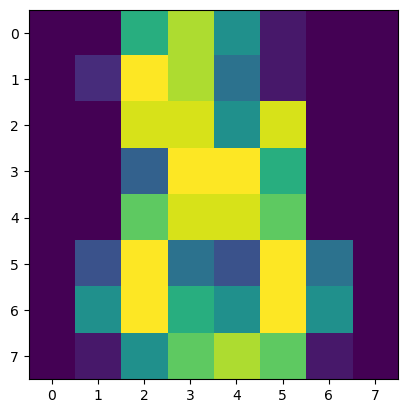

In [6]:
plt.imshow(digitos['data'][1796].reshape(8,8))

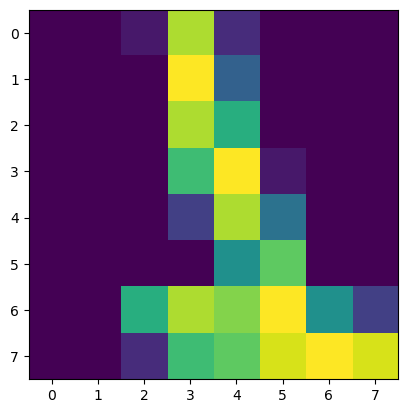

In [7]:
plt.imshow(digitos['data'][1000].reshape(8,8))

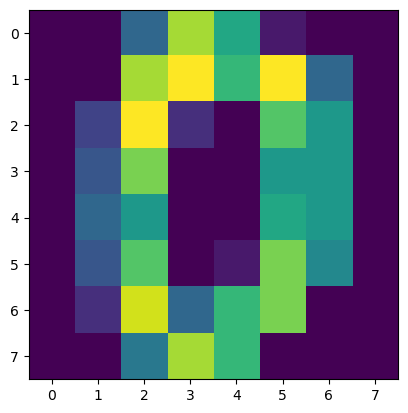

In [8]:
#También se puede pintar por sus números que van del 0 al 9 
plt.imshow(digitos.images[0]);

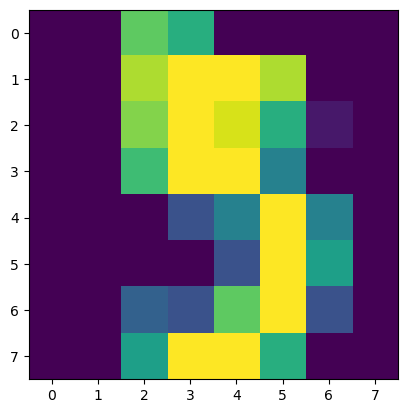

In [9]:
plt.imshow(digitos.images[5]);

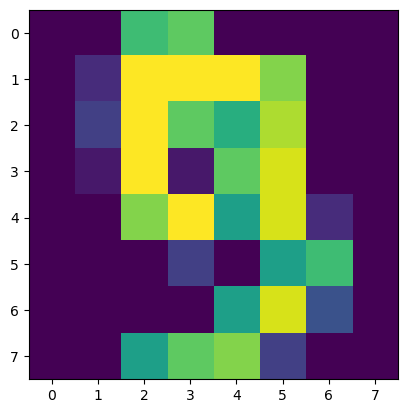

In [10]:
plt.imshow(digitos.images[9]);

Como aplicar los autoencoders ? 

In [11]:
X = digitos.data
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [12]:
#Normalizamos los números, es decir que todos comiencen y terminen dentro del mismo rango numérico 
X = X/16.0 #Todos los números terminan entre 0 y 1
X

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [13]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [14]:
imagen_entrada = Input(shape=(64,)) #Capa Tensorial
#Aplano el array de 8x8 al de 64 elementos en 1 sola línea

Dense, es la capa densa que contiene muchos puntos de información conectados entre sí (todos conectados con todos) 

Nodos = 32, son los nodos de la red neuronal, partimos desde la mitad de los 64 pixeles del dataset, luego se lo puede ir cambiando.  

relu = rectified linear unit 

Es como tener 32 amigos y les quiero pasar un mensaje a cada uno de ellos y cada punto representa una neurona. Ahora quiero modificar el mensaje a cada uno, para esto uso la capa densa Dense. 

In [15]:
codificado = Dense(32, activation='relu') (imagen_entrada)

La función de activación sigmoid se utiliza en la capa de salida del autoencoder para asegurar que los valores de salida estén entre 0 y 1, lo cual es necesario dado que los datos de entrada también fueron normalizados a este rango.

In [16]:
#64 nodos de los 64 pixeles originales
#Sigmoid convierte los valores de entrada entre 0 y 1
decodificado = Dense(64, activation='sigmoid')(codificado)

In [17]:
autoencoder = Model(imagen_entrada, decodificado)

'Binary_crossentropy' es usada porque es efectiva para comparar cada píxel de la imagen de entrada con su correspondiente en la imagen reconstruida, especialmente cuando los valores están entre 0 y 1.

In [18]:
autoencoder.compile(optimizer='adam', #Prepara el modelo para el entrenamiento
                   loss='binary_crossentropy') #Loss mide que tan bien el modelo está haciendo su trabajo
#Adam, es el algoritmo que ajusta automáticamente la tasa de aprendizaje

Un epoch representa una iteración completa sobre todo el conjunto de datos de entrenamiento. En este caso, configurar epochs=100 indica que el modelo revisará los datos de entrenamiento 100 veces durante su entrenamiento.

shuffle=True, es para mezclar los datos antes de cada epoch ayuda a prevenir que el modelo aprenda o memorice el orden específico de los ejemplos, lo cual es crucial para la generalización del modelo en datos no vistos.

In [19]:
autoencoder.fit(X_train,  #Train tanto para entradas y salidas
               X_train,
               epochs=100, 
               batch_size=256, #En train los datos se procesan en lotes de 256, y asi el entramiento es más eficiente. 
               shuffle=True, 
               validation_data=(X_test, X_test)) 

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6874 - val_loss: 0.6703
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6635 - val_loss: 0.6469
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6400 - val_loss: 0.6231
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6156 - val_loss: 0.5977
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5900 - val_loss: 0.5702
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5629 - val_loss: 0.5414
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5338 - val_loss: 0.5130
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5056 - val_loss: 0.4873
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4813 - val_loss: 0.4660
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4601 - val_loss: 0.4495
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4442 - val_loss: 0.4376
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4347 - val_loss: 0.4290
E

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step


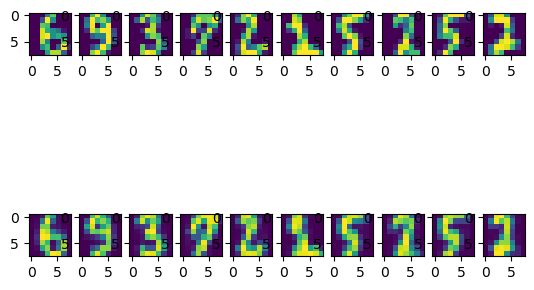

In [20]:
#Visualizar los resultados. 

for i in range(10):
    plt.subplot(2,  
                10,
               i+1)
    plt.imshow(X_test[i].reshape(8,8))
    plt.subplot(2,
                10,
               i+1+10)
    plt.imshow(autoencoder.predict(X_test)[i].reshape(8,8));